# CBOE Margin Requirement

 - https://www.cboe.com/education/tools/margin-calculator/
 - https://cdn.cboe.com/resources/membership/Margin_Manual.pdf

c:\Users\Admin\OneDrive\Python
0.0
0.0


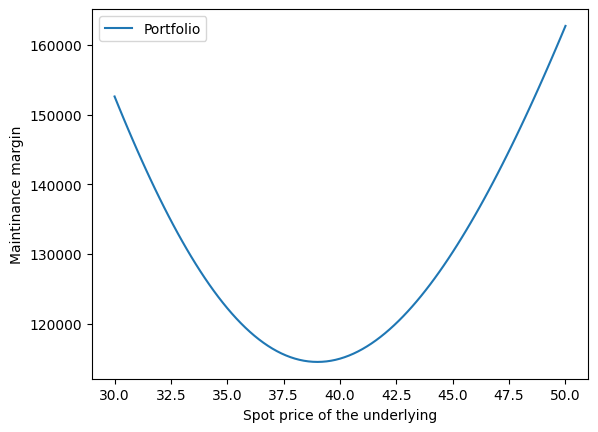

In [1]:
%cd ..
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import toolkit as ftk

underlying = np.linspace(30, 50, 101)
portfolio = pd.DataFrame([
    {'otype': 'c', 'quantity': 1, 'strike': 35, 'expiration': 1, 'multiplier': 100, 'reduced': 1,
     'value': 100 * ftk.black_scholes.price_call(35, underlying, 0.05, 0.1, 0.5, 0)},
    {'otype': 'p', 'quantity': 1, 'strike': 45, 'expiration': 1, 'multiplier': 100, 'reduced': 1,
     'value': 100 * ftk.black_scholes.price_put(45, underlying, 0.05, 0.1, 0.5, 0)},
    # FIXME
    #{'otype': 'u', 'quantity': 100,
    # 'value': underlying}
])

# plt.plot
portfolio.apply(lambda x: print(ftk.cboe_margin.margin(ftk.cboe_margin.margin(**x.to_dict(), underlying=underlying))), axis=1)
plt.plot(underlying, ftk.cboe_margin.margin_strategy(
    portfolio, underlying), label='Portfolio')
plt.xlabel("Spot price of the underlying")
plt.ylabel("Maintinance margin")
plt.legend()
plt.show()